In [1]:
from google.colab import drive
drive.mount("/content/drive")
!ls "drive/Shared drives/PMDL Project"

Mounted at /content/drive
 CNN.ipynb				     'LSTM with SA.ipynb'
 CNN_With_ExtraFeatures.ipynb		      Models
 CNN_With_SA.ipynb			     'Old Notebooks'
'Consulting proposal.gslides'		     'Project Wireframes.gslides'
'Data Preprocessing.ipynb'		     'Prototyping presentation.gslides'
 Datasets				     'Spam filter 2.zip'
'Individual Program Brief Template.gslides'  'Spam Filter.zip'
 LSTM.ipynb


In [2]:
import pickle
import keras

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate

import matplotlib.pyplot as plt

In [3]:
dataset_dir = "drive/Shared drives/PMDL Project/Datasets"

pickle_off_x_tr = open(dataset_dir + "/train_padded.pickle","rb")
train_padded = pickle.load(pickle_off_x_tr)

pickle_off_y_tr = open(dataset_dir + "/train_labels.pickle","rb")
train_labels = pickle.load(pickle_off_y_tr)

pickle_off_x_test = open(dataset_dir + "/test_padded.pickle","rb")
test_padded = pickle.load(pickle_off_x_test)

pickle_off_y_test = open(dataset_dir + "/test_labels.pickle","rb")
test_labels = pickle.load(pickle_off_y_test)

pickle_off_polarity_tr = open(dataset_dir + "/train_polarity.pickle","rb")
polarity_tr = pickle.load(pickle_off_polarity_tr)

pickle_off_polarity_test = open(dataset_dir + "/test_polarity.pickle","rb")
polarity_test = pickle.load(pickle_off_polarity_test)

In [ ]:
print(len(train_padded))
print(len(polarity_tr))

print(len(test_padded))
print(len(polarity_test))

4757
4757
1190
1190


In [4]:
def train_and_vizualize_model(model, epochs_num):
  history = model.fit(
    [train_padded, polarity_tr], train_labels, batch_size=32, epochs=epochs_num, validation_data=([test_padded, polarity_test], test_labels),
)
  x = range(1,epochs_num + 1)
  plt.plot(x, history.history['loss'], 'r', label='Training Loss')
  plt.plot(x,history.history['val_loss'], 'b', label='Validation Loss')

  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

In [5]:
inputA = Input(shape=(train_padded.shape[1],))
inputB = Input(shape=(1,))

x = Embedding(564273, 36)(inputA)
x = LSTM(64, dropout=0.4)(x)
x = Model(inputs=inputA, outputs=x)

combined = concatenate([x.output, inputB])

z = Dense(1, activation="softplus")(combined)
model = Model(inputs=[x.input, inputB], outputs=z)

model.compile(loss='poisson', optimizer="Adamax", metrics=['accuracy'])

Epoch 1/30
149/149 [==============================] - 13s 74ms/step - loss: 0.8169 - accuracy: 0.5112 - val_loss: 0.8820 - val_accuracy: 0.5403
Epoch 2/30
149/149 [==============================] - 10s 70ms/step - loss: 0.6696 - accuracy: 0.7684 - val_loss: 0.6442 - val_accuracy: 0.9186
Epoch 3/30
149/149 [==============================] - 10s 70ms/step - loss: 0.5214 - accuracy: 0.9381 - val_loss: 0.6088 - val_accuracy: 0.9471
Epoch 4/30
149/149 [==============================] - 10s 70ms/step - loss: 0.5075 - accuracy: 0.9551 - val_loss: 0.6062 - val_accuracy: 0.9513
Epoch 5/30
149/149 [==============================] - 10s 70ms/step - loss: 0.5017 - accuracy: 0.9635 - val_loss: 0.6014 - val_accuracy: 0.9530
Epoch 6/30
149/149 [==============================] - 10s 70ms/step - loss: 0.4931 - accuracy: 0.9675 - val_loss: 0.5992 - val_accuracy: 0.9622
Epoch 7/30
149/149 [==============================] - 11s 71ms/step - loss: 0.4872 - accuracy: 0.9698 - val_loss: 0.6023 - val_accuracy:

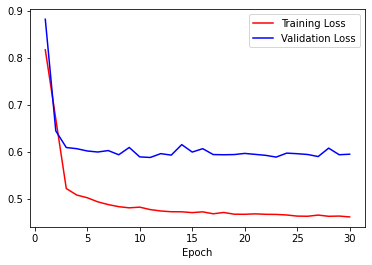

In [6]:
train_and_vizualize_model(model, 30)

In [8]:
score = model.evaluate([test_padded, polarity_test], test_labels, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.594494640827179
Test accuracy: 0.9739933013916016


In [9]:
models_dir = "drive/Shared drives/PMDL Project/Models"
pickle_lstm = open(models_dir + "/LSTM_SA.pickle","wb")
pickle.dump(model, pickle_lstm)
pickle_lstm.close()

INFO:tensorflow:Assets written to: ram://d77bfee3-8fa6-42fe-837d-988a39a6456b/assets


INFO:tensorflow:Assets written to: ram://d77bfee3-8fa6-42fe-837d-988a39a6456b/assets
